# Analysis of Public Safety Trends in New York City
In this notebook we are explicitly creating functions, writing doctests and checking if the doctests passed or not. There is another jupyter notebook named <b>Final_Code_IS590PR_Import_Func</b> which contains the entire code without explicit function creation. In that notebook, the functions are being imported from the <b>Final_Project_Code_IS590PR_Functions.py</b> file.

References <br /> 
https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html <br /> 
https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html <br />
https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index<br />
https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr<br/> 
https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html<br />
https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/<br/>   

<br /> 
Data Sources<br /> 
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i<br /> 
https://catalog.data.gov/dataset/nypd-arrests-data-historic<br /> 
https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp<br /> 
https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj<br /> 
https://worldpopulationreview.com/us-cities/new-york-city-population/ <br/>
https://en.wikipedia.org/wiki/Demographics_of_New_York_City<br/> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis 1: 
The number of crimes decreased in neighborhoods where the previous number of arrests is high indicating that maybe the police 
force is handling the situations better.

In [2]:
my_dir = 'C:/Users/rahul/Downloads/UIUC/Sem 2 - Spring 2020/Courses/Programing Analytics/Final Project/DataSets/' #https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb
NYPD_Arrests = my_dir + 'NYPD_Arrests_Data__Historic_.csv' # Loading NYPD Arrest Data file
Complaints = my_dir +  'NYPD_Complaint_Data_Historic.csv' # Loading NYPD Complaints Data file
EMS_incident = my_dir +  'EMS_Incident_Dispatch_Data.csv' # Loading EMS incident dispatch Data file

In [3]:
def dataset_validation():
    """

    This function is used to check if the input data files are having the correct column headers that are needed
    for our hypotheses analysis. The files need to be loaded from the local computer directory since they are
    very large. If the files are not present , then the user can download it from a google drive link provided
    by our team or can go to the official website from which the data was downloaded.


    >>> NYPD_Arrests = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Arrest_Correct.csv' # Loading NYPD Arrest Data file
    >>> Complaints = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Complaints_Correct.csv' # Loading NYPD Complaints Data file
    >>> EMS_incident = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/EMS_Correct.csv' # Loading EMS incident dispatch Data file
    >>> dataset_validation()
    The columns necessary for analysis are present in the EMS data file
    The columns necessary for analysis are present in the Complaints data file
    The columns necessary for analysis are present in the Arrests data file
    """

    data_EMS = pd.read_csv(EMS_incident, nrows=1)
    data_Complaints = pd.read_csv(Complaints, nrows=1)
    data_Arrest = pd.read_csv(NYPD_Arrests, nrows=1)
    All_Col_list_EMS = list(data_EMS)
    All_Col_list_Complaints = list(data_Complaints)
    All_Col_list_Arrest = list(data_Arrest)

    Req_Complaints_cols = ['CMPLNT_NUM', 'CMPLNT_FR_DT', 'BORO_NM', 'VIC_RACE', 'OFNS_DESC']
    Req_Arrests_cols = ['ARREST_BORO', 'ARREST_DATE', 'ARREST_KEY']
    Req_EMS_cols = ['INCIDENT_RESPONSE_SECONDS_QY', 'INCIDENT_DATETIME', 'BOROUGH']

    check_EMS = all(item in All_Col_list_EMS for item in
                    Req_EMS_cols)  # https://www.techbeamers.com/program-python-list-contains-elements/
    if check_EMS is True:
        print("The columns necessary for analysis are present in the EMS data file")
    else:
        print(
            "The columns necessary for analysis are not present in the EMS data file. Kindly download the dataset files from - https://drive.google.com/open?id=1g_StaWiaWQyNjNOu3wlFKG2dsIJZjyjF or the latest file from https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj")
    check_Complaints = all(item in All_Col_list_Complaints for item in
                           Req_Complaints_cols)  # https://www.techbeamers.com/program-python-list-contains-elements/
    if check_Complaints is True:
        print("The columns necessary for analysis are present in the Complaints data file")
    else:
        print(
            "The columns necessary for analysis are not present in the Complaints data file. Kindly download the dataset files from - https://drive.google.com/open?id=112LOH-fYjUn5AHVnFbgQYRAAhSCcXvjq or the latest file from https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i ")

    check_Arrests = all(item in All_Col_list_Arrest for item in
                        Req_Arrests_cols)  # https://www.techbeamers.com/program-python-list-contains-elements/
    if check_Arrests is True:
        print("The columns necessary for analysis are present in the Arrests data file")
    else:
        print(
            "The columns necessary for analysis are not present in the Arrests data file. Kindly download the dataset files from - https://drive.google.com/open?id=1g_StaWiaWQyNjNOu3wlFKG2dsIJZjyjF or the latest file from https://catalog.data.gov/dataset/nypd-arrests-data-historic")

In [4]:
dataset_validation()

The columns necessary for analysis are present in the EMS data file
The columns necessary for analysis are present in the Complaints data file
The columns necessary for analysis are present in the Arrests data file


In [52]:
def get_file(file, cols) -> pd.DataFrame:
    """
    This function produced a dataframe that consists of the columns that are needed fr analysis from a datafile.
    Since in our project we are using between 2 - 4 columns for each hypothesis analysis rather than loading the
    entire data file, the dataframe will end up containing only between 2-4 columns.
    >>> test_file = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Airplane.csv'
    >>> print("Enter 'AircraftHex' and 'SessionID' as column names")
    Enter 'AircraftHex' and 'SessionID' as column names
    >>> answer = get_file(test_file,2)
    >>> answer.iloc[0]['AircraftHex']
    'A902B5'
    >>> test_file = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Airplane.csv'
    >>> get_file(test_file,5)
    'Invalid number of columns'
    """

    if cols == 2:
        col1 = input('enter your column name 1 and press enter:')
        # print(type(col1))
        col2 = input('enter your column name 2 and press enter:')
        col_list = [col1, col2]
    elif cols == 3:
        col1 = input('enter your column name 1 and press enter:')
        # print(type(col1))
        col2 = input('enter your column name 2 and press enter:')
        col3 = input('enter your column name 3 and press enter:')
        col_list = [col1, col2, col3]
    elif cols == 4:
        col1 = input('enter your column name 1 inside and press enter:')
        col2 = input('enter your column name 2 inside and press enter:')
        col3 = input('enter your column name 3 inside and press enter:')
        col4 = input('enter your column name 4 inside and press enter:')
        col_list = [col1, col2, col3, col4]
    else:
        return "Invalid number of columns"
    data_file = pd.read_csv(file, usecols=col_list)  # Import only necessary columns from the dataset
    return data_file


In [7]:
NYC_Complaint_Data = get_file(Complaints,3) #Using only column names - CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM
NYC_Complaint_Data.head(5)

enter your column name 1 and press enter:CMPLNT_NUM
enter your column name 2 and press enter:CMPLNT_FR_DT
enter your column name 3 and press enter:BORO_NM


,CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM
0,876525802,04/10/2008,BROOKLYN
1,402693528,06/03/2007,MANHATTAN
2,832030069,02/16/2010,QUEENS
3,538308771,11/10/2009,BROOKLYN
4,965693192,04/11/2006,STATEN ISLAND


In [8]:
# Extracting the Month and Year of the incident
def extract_year_month(x, old_col: str, month_column: str, year_column: str):
    """
    This function is used to extract the year and the month from an existing dataframe column that
    contains date values in the format mm/dd/yyyy. The extraction process results in the formation
    of two new columns in the dataframe - one containing only the months and the other containing only
    the year values.

    :param x: The dataframe on which opeartions are to be performed
    :param old_col: The dataframe column containing date in format mm/dd/yyyy
    :param month_column: The dataframe column to be created post extraction of the month from the column name old_col
    :param year_column: The dataframe column to be created post extraction of the year from the column name old_col
    >>> sample_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/sample_date_func.csv'
    >>> sample_df = pd.read_csv(sample_csv)
    >>> answer = extract_year_month(sample_df,'Date','Month','Year')
    >>> answer.iloc[0]['Population'] #doctest: +NORMALIZE_WHITESPACE
    8300124
    """
    x[month_column] = x[old_col].str[:2]
    x[year_column] = x[old_col].str[6:10]
    return x



In [9]:
extract_year_month(NYC_Complaint_Data,'CMPLNT_FR_DT','Complaint_Filed_Month','Complaint_Filed_Year')

,CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM,Complaint_Filed_Month,Complaint_Filed_Year
0,876525802,04/10/2008,BROOKLYN,04,2008
1,402693528,06/03/2007,MANHATTAN,06,2007
2,832030069,02/16/2010,QUEENS,02,2010
3,538308771,11/10/2009,BROOKLYN,11,2009
4,965693192,04/11/2006,STATEN ISLAND,04,2006
5,141085517,06/23/2011,BROOKLYN,06,2011
6,484433797,11/24/2007,BRONX,11,2007
7,106486628,03/29/2008,BROOKLYN,03,2008
8,859668043,04/21/2006,MANHATTAN,04,2006
9,499632944,04/14/2006,STATEN ISLAND,04,2006


In [10]:
def get_arrest_or_crime_count(dfname, col_year, col_month, col_boro, col_key) -> pd.core.frame.DataFrame:
    """
    This function is used to create a multilevel index dataframe that groups the data by the
    neighbourhood, year , and month columns and finally produces a column of the aggragation
    type as count to display either the total count of arrests or the total count of complaints

    :param dfname: The dataframe on which opeartions are to be performed
    :param col_year: Column name containing year value
    :param col_month: Column name containing month value
    :param col_boro:Column name containing borough/area value
    :param col_key: Column name on which aggreagation has to be done
    :return: a dataframe containing year,month,neighbourhood,aggregated column count

    >>> sample_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/arrest_crime_count_function.csv'
    >>> sample_df = pd.read_csv(sample_csv)
    >>> answer = get_arrest_or_crime_count(sample_df,'Complaint_Filed_Year','Complaint_Filed_Month','BORO_NM','CMPLNT_NUM')
    >>> answer.index.levels[1]
    Int64Index([2006, 2009, 2011, 2015], dtype='int64', name='Complaint_Filed_Year')
    """

    # replacing Borough initials with complete names
    dfname = dfname.dropna(subset=[col_year])
    dfname = dfname.astype({col_year: 'int64'})
    dfname = dfname[dfname[col_year] > 2005]
    data_count = dfname.groupby([col_boro, col_year, col_month]).agg({col_key: [
        'count']})  # https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
    return data_count


In [11]:
Crime_count_result = get_arrest_or_crime_count(NYC_Complaint_Data,'Complaint_Filed_Year','Complaint_Filed_Month','BORO_NM','CMPLNT_NUM')
Crime_count_result.head(10)

CMPLNT_NUM
                                                        count
BORO_NM Complaint_Filed_Year Complaint_Filed_Month           
BRONX   2006                 01                          9363
                             02                          7758
                             03                          9425
                             04                          8756
                             05                          9454
                             06                          9239
                             07                          9867
                             08                          9825
                             09                          9740
                             10                          9927

In [12]:
NYC_Arrest_Data = get_file(NYPD_Arrests,3) #Importing only columns -ARREST_BORO, ARREST_DATE, ARREST_KEY
NYC_Arrest_Data.head(10)

enter your column name 1 and press enter:ARREST_BORO
enter your column name 2 and press enter:ARREST_DATE
enter your column name 3 and press enter:ARREST_KEY


,ARREST_KEY,ARREST_DATE,ARREST_BORO
0,173130602,12/31/2017,Q
1,173114463,12/31/2017,Q
2,173113513,12/31/2017,K
3,173113423,12/31/2017,M
4,173113421,12/31/2017,M
5,173130583,12/31/2017,K
6,173129349,12/31/2017,M
7,173128438,12/31/2017,M
8,173128437,12/31/2017,M
9,173128433,12/31/2017,M


In [13]:
NYC_Arrest_Data.ARREST_BORO.unique()

array(['Q', 'K', 'M', 'S', 'B', nan], dtype=object)

In [14]:
#extracting the month and year from the date column
extract_year_month(NYC_Arrest_Data,'ARREST_DATE','Arrest_Month','Arrest_Year')

,ARREST_KEY,ARREST_DATE,ARREST_BORO,Arrest_Month,Arrest_Year
0,173130602,12/31/2017,Q,12,2017
1,173114463,12/31/2017,Q,12,2017
2,173113513,12/31/2017,K,12,2017
3,173113423,12/31/2017,M,12,2017
4,173113421,12/31/2017,M,12,2017
5,173130583,12/31/2017,K,12,2017
6,173129349,12/31/2017,M,12,2017
7,173128438,12/31/2017,M,12,2017
8,173128437,12/31/2017,M,12,2017
9,173128433,12/31/2017,M,12,2017


In [15]:
#Renaming the Borough Names
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'K'}, 'BROOKLYN')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'M'}, 'MANHATTAN')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'S'}, 'STATEN ISLAND')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'B'}, 'BRONX')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'Q'}, 'QUEENS')

In [16]:
Arrest_count_result = get_arrest_or_crime_count(NYC_Arrest_Data,'Arrest_Year','Arrest_Month','ARREST_BORO','ARREST_KEY')
Arrest_count_result.head(10)

ARREST_KEY
                                          count
ARREST_BORO Arrest_Year Arrest_Month           
BRONX       2006        01                 7338
                        02                 6600
                        03                 7854
                        04                 6720
                        05                 7176
                        06                 6562
                        07                 6839
                        08                 7292
                        09                 6881
                        10                 7348

In [17]:
result = pd.concat([Crime_count_result, Arrest_count_result], axis=1, join='inner')
result=result.sort_index(axis = 0) 
#result = result.reset_index()
result

CMPLNT_NUM ARREST_KEY
                           count      count
BRONX         2006 01       9363       7338
                   02       7758       6600
                   03       9425       7854
                   04       8756       6720
                   05       9454       7176
                   06       9239       6562
                   07       9867       6839
                   08       9825       7292
                   09       9740       6881
                   10       9927       7348
                   11       8887       6700
                   12       8877       6585
              2007 01       9846       9386
                   02       8139       7945
                   03       9404       8398
                   04       9388       7894
                   05      10685       8587
                   06       9954       7660
                   07      10366       7779
                   08      10259       8277
                   09      10438       7591
                   10      10330       8125
                   11       9235       7529
                   12       8839       6546
              2008 01      10325       9217
                   02       8767       8327
                   03       9739       8912
                   04       9619       8215
                   05       9903       8405
                   06      10013       7822
...                          ...        ...
STATEN ISLAND 2016 07       1907        987
                   08       1865       1095
                   09       1844       1124
                   10       1933       1065
                   11       1759        925
                   12       1677        933
              2017 01       1783        972
                   02       1457        897
                   03       1697        964
                   04       1722       1011
                   05       1909       1030
                   06       1908        993
                   07       1937       1032
                   08       1884       1003
                   09       1819        895
                   10       1889        949
                   11       1631        855
                   12       1643        777
              2018 01       1644        946
                   02       1513        841
                   03       1621        863
                   04       1749        921
                   05       1891        952
                   06       1813        828
                   07       1913        894
                   08       1829        927
                   09       1703        776
                   10       1772        936
                   11       1638        798
                   12       1645        742

[780 rows x 2 columns]

In [18]:
def plot_graph(n, df, l, b, var1: str, var2: str, var3: str, var4: str, var5: str, constant: str):
    '''
    This function is used to plot a line graph for a multilevel index dataframe. The graph has multiple
    subplots as well depending upon the number of index groups in the first column of the dataframe. eg
    in one datframe we have 5 boroughs that are used as the grouping column and thus we will have 5
    subplots

    :param n: number of subplots
    :param df: the dataframe for which graphs have to be plotted
    :param l: length of the subplot figure
    :param b: breadth of the subplot figure
    :param var1: Index value to be plotted
    :param var2: Index value to be plotted
    :param var3: Index value to be plotted
    :param var4: Index value to be plotted
    :param var5: Index value to be plotted
    :param constant: Constant part of text to be displayed in the title of the subplot

    # https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
    >>> arrays = [np.array(['india', 'USA', 'italy', 'italy', 'india', 'canada', 'india', 'USA','australia']),np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two','one'])]
    >>> df_new = pd.DataFrame(np.random.randn(9, 5), index=arrays) #Creating a dummy multi-index dataframe
    >>> plot_graph(5,df_new,18,20,'india','USA','italy','australia','canada','Just testing')
    '''

    figure, axis = plt.subplots(n, 1, figsize=(
    l, b))  # https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
    df.xs(var1).plot(kind='line', ax=axis[0]).set_title(
        var1 + ' - ' + constant)  # https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
    df.xs(var2).plot(kind='line', ax=axis[1]).set_title(var2 + ' - ' + constant)
    df.xs(var3).plot(kind='line', ax=axis[2]).set_title(var3 + ' - ' + constant)
    df.xs(var4).plot(kind='line', ax=axis[3]).set_title(var4 + ' - ' + constant)
    df.xs(var5).plot(kind='line', ax=axis[4]).set_title(var5 + ' - ' + constant)


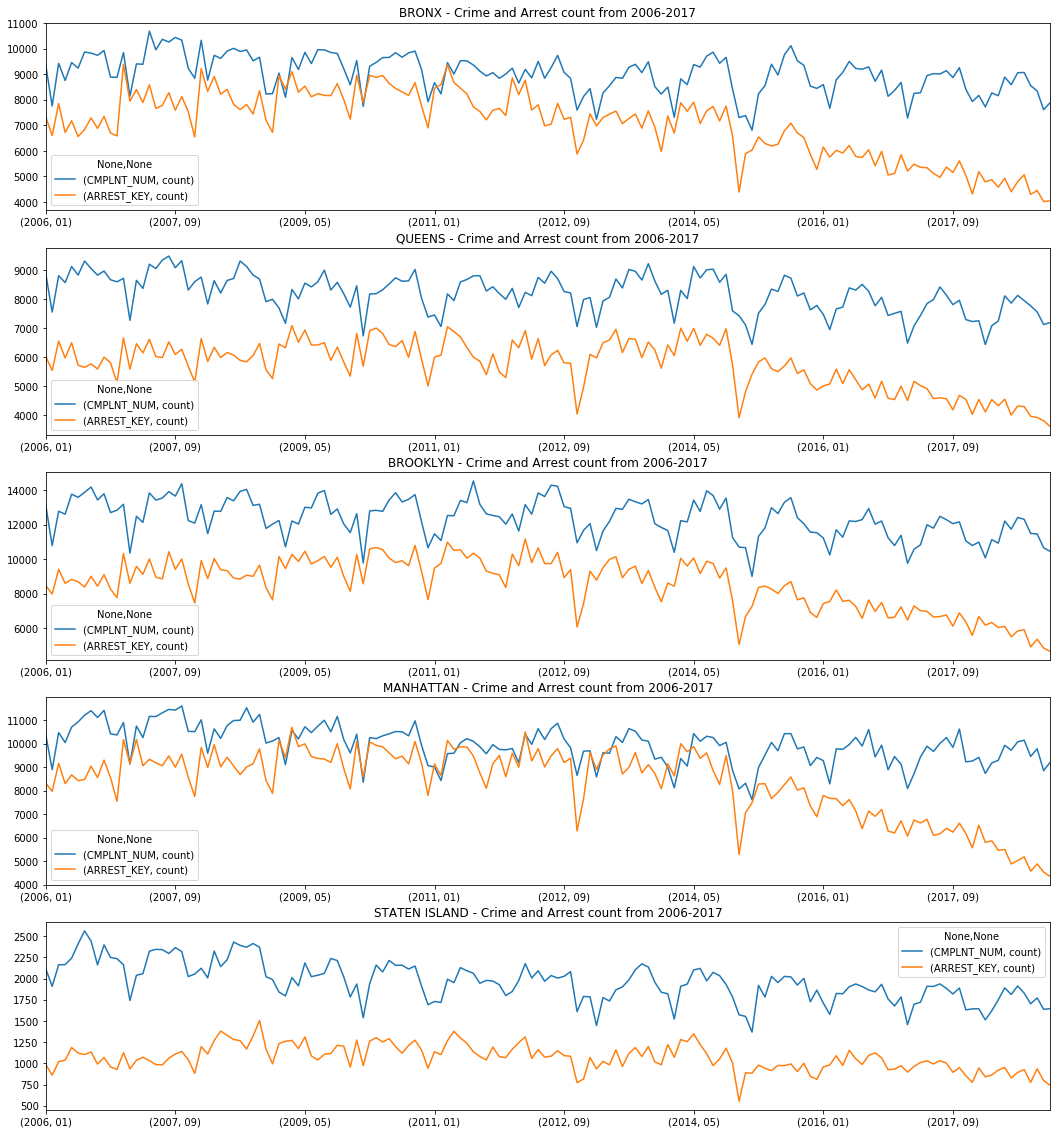

In [19]:
plot_graph(5,result,18,20,'BRONX','QUEENS','BROOKLYN','MANHATTAN','STATEN ISLAND','Crime and Arrest count from 2006-2017')


# HYPOTHESIS 2:
There exist certain types of crimes where there is prejudice agianst the victims of a particular race

In [20]:
NYC_Complaints_df = get_file(Complaints,3) #Importing only columns - VIC_RACE,OFNS_DESC,CMPLNT_NUM
NYC_Complaints_df.head(10)

enter your column name 1 and press enter:VIC_RACE
enter your column name 2 and press enter:OFNS_DESC
enter your column name 3 and press enter:CMPLNT_NUM


,CMPLNT_NUM,OFNS_DESC,VIC_RACE
0,876525802,PETIT LARCENY,BLACK
1,402693528,DANGEROUS WEAPONS,UNKNOWN
2,832030069,ROBBERY,UNKNOWN
3,538308771,PETIT LARCENY,UNKNOWN
4,965693192,THEFT-FRAUD,WHITE
5,141085517,DANGEROUS WEAPONS,UNKNOWN
6,484433797,POSSESSION OF STOLEN PROPERTY,UNKNOWN
7,106486628,DANGEROUS DRUGS,UNKNOWN
8,859668043,ROBBERY,WHITE HISPANIC
9,499632944,VEHICLE AND TRAFFIC LAWS,UNKNOWN


In [21]:
def race_percentage(row, colname) -> pd.core.series.Series:
    # https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
    # https://worldpopulationreview.com/us-cities/new-york-city-population/
    # total NYC population = 8175133
    # Creating a function to add crime per capita values
    """
    This function is used to return a pandas series that has the race percentage value of all the different
    races present in NYC.


    :param row: denotes that the operation has to be performed across rows
    :param colname: Column name on which operation has to be done
    :return : a specific numeric value if a row match is found
    >>> data_dummy = {'Race':  ['AMERICAN INDIAN/ALASKAN NATIVE','ASIAN / PACIFIC ISLANDER', 'BLACK','BLACK HISPANIC','WHITE','WHITE HISPANIC','UNKNOWN/OTHER'],'Offense': ['FRAUDS', 'BURGLARY','HARRASSMENT 2','FORGERY','FRAUDS','FRAUDS','FRAUDS'],'Comp_no':[1,2,3,4,5,6,7]}
    >>> df_dummy = pd.DataFrame (data_dummy, columns = ['Race','Offense','Comp_no'])
    >>> df_dummy.apply (lambda row: race_percentage(row,'Race'), axis=1)
    0    0.0043
    1    0.1400
    2    0.2195
    3    0.0233
    4    0.3214
    5    0.1053
    6    0.1862
    dtype: float64



    """

    if row[colname] == 'AMERICAN INDIAN/ALASKAN NATIVE':
        return 0.0043
    if row[colname] == 'ASIAN / PACIFIC ISLANDER':
        return 0.14
    if row[colname] == 'BLACK':
        return 0.2195
    if row[colname] == 'BLACK HISPANIC':
        return 0.0233
    if row[colname] == 'WHITE':
        return 0.3214
    if row[colname] == 'WHITE HISPANIC':
        return 0.1053
    if row[colname] == 'UNKNOWN/OTHER':
        return 0.1862


In [22]:
NYC_Complaints_df.VIC_RACE.unique() # get unique values of the races in the dataframe

array(['BLACK', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE', nan,
       'OTHER'], dtype=object)

In [23]:
def offense_per_victim_race(dataframe_name) -> pd.DataFrame:
    """
    This function returns a dataframe that contains the information pertaining to the offense committed
    and the victims. It also takes the victim race into consideration and has a column that has normalized
    complaint numbers based on that race percentage

    :param dataframe_name:
    >>> sample = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/offense_per_victim_race_sample.csv'
    >>> sample_df = pd.read_csv(sample)
    >>> ans = offense_per_victim_race(sample_df)
    >>> ans.iloc[0]['race_percentage']
    0.14
    """
    dataframe_name.VIC_RACE = dataframe_name.VIC_RACE.fillna('UNKNOWN')  # replacing nans with 'UNKNOWN'
    dataframe_name = dataframe_name.replace({'VIC_RACE': 'UNKNOWN'}, 'UNKNOWN/OTHER')
    dataframe_name = dataframe_name.replace({'VIC_RACE': 'OTHER'}, 'UNKNOWN/OTHER')
    # Selecting only a particular set of crimes that involve harming another human
    type_of_crime = ['HARRASSMENT 2', 'BURGLARY', 'ROBBERY', 'FELONY ASSAULT', 'SEX CRIMES', 'OFFENSES INVOLVING FRAUD',
                     'RAPE', 'THEFT-FRAUD', 'MURDER & NON-NEGL. MANSLAUGHTER', 'KIDNAPPING & RELATED OFFENSES',
                     'OFFENSES RELATED TO CHILDREN', 'KIDNAPPING', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY',
                     'GRAND LARCENY', 'FORGERY', 'FRAUDS', 'ASSAULT 3 & RELATED OFFENSES']
    # https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
    dataframe_name = dataframe_name[dataframe_name.OFNS_DESC.isin(type_of_crime)]
    # race_count = complaints_df_new.groupby(['OFNS_DESC','VIC_RACE']).agg({'CMPLNT_NUM': ['count']}).reset_index()
    dataframe_name = dataframe_name.groupby(["OFNS_DESC", "VIC_RACE"], as_index=False).count()
    dataframe_name = dataframe_name[['OFNS_DESC', 'VIC_RACE', 'CMPLNT_NUM']]
    dataframe_name.apply(lambda row: race_percentage(row, 'VIC_RACE'),
                         axis=1)  # https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
    dataframe_name['race_percentage'] = dataframe_name.apply(lambda row: race_percentage(row, 'VIC_RACE'), axis=1)
    # race_count_new['race_population'] = race_count_new['race_percentage']*8175133
    # race_count_new['race_population'] = race_count_new['race_population'].astype('int64')
    dataframe_name['Normalized results'] = dataframe_name['CMPLNT_NUM'] / dataframe_name['race_percentage']
    dataframe_name['Normalized results'] = dataframe_name['Normalized results'].astype('int64')
    return dataframe_name


In [24]:
NYC_Complaints_df_result = offense_per_victim_race(NYC_Complaints_df)
NYC_Complaints_df_result.head(10)

,OFNS_DESC,VIC_RACE,CMPLNT_NUM,race_percentage,Normalized results
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,3724,0.0043,866046
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,46057,0.1400,328978
2,ASSAULT 3 & RELATED OFFENSES,BLACK,277634,0.2195,1264847
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,41888,0.0233,1797768
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN/OTHER,49764,0.1862,267261
5,ASSAULT 3 & RELATED OFFENSES,WHITE,98708,0.3214,307118
6,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,200300,0.1053,1902184
7,BURGLARY,AMERICAN INDIAN/ALASKAN NATIVE,1379,0.0043,320697
8,BURGLARY,ASIAN / PACIFIC ISLANDER,20494,0.1400,146385
9,BURGLARY,BLACK,41857,0.2195,190692


In [25]:
NYC_Complaints_df1 = NYC_Complaints_df_result.groupby(['OFNS_DESC','VIC_RACE']).agg({'Normalized results': ['sum']})
NYC_Complaints_df1

Normalized results
                                                                           sum
OFNS_DESC                    VIC_RACE                                         
ASSAULT 3 & RELATED OFFENSES AMERICAN INDIAN/ALASKAN NATIVE             866046
                             ASIAN / PACIFIC ISLANDER                   328978
                             BLACK                                     1264847
                             BLACK HISPANIC                            1797768
                             UNKNOWN/OTHER                              267261
                             WHITE                                      307118
                             WHITE HISPANIC                            1902184
BURGLARY                     AMERICAN INDIAN/ALASKAN NATIVE             320697
                             ASIAN / PACIFIC ISLANDER                   146385
                             BLACK                                      190692
                             BLACK HISPANIC                             245021
                             UNKNOWN/OTHER                              424022
                             WHITE                                      173976
                             WHITE HISPANIC                             299249
FELONY ASSAULT               AMERICAN INDIAN/ALASKAN NATIVE             227209
                             ASIAN / PACIFIC ISLANDER                    99064
                             BLACK                                      489708
                             BLACK HISPANIC                             651459
                             UNKNOWN/OTHER                              166874
                             WHITE                                       90258
                             WHITE HISPANIC                             597122
FORGERY                      AMERICAN INDIAN/ALASKAN NATIVE              18837
                             ASIAN / PACIFIC ISLANDER                     4600
                             BLACK                                        9161
                             BLACK HISPANIC                              18326
                             UNKNOWN/OTHER                              335225
                             WHITE                                        7433
                             WHITE HISPANIC                              15574
FRAUDS                       AMERICAN INDIAN/ALASKAN NATIVE              27674
                             ASIAN / PACIFIC ISLANDER                    14028
...                                                                        ...
PETIT LARCENY                WHITE                                      714175
                             WHITE HISPANIC                            1198822
RAPE                         AMERICAN INDIAN/ALASKAN NATIVE              12325
                             ASIAN / PACIFIC ISLANDER                     7842
                             BLACK                                       32451
                             BLACK HISPANIC                              54763
                             UNKNOWN/OTHER                                6181
                             WHITE                                        9492
                             WHITE HISPANIC                              57853
ROBBERY                      AMERICAN INDIAN/ALASKAN NATIVE             408372
                             ASIAN / PACIFIC ISLANDER                   194092
                             BLACK                                      311507
                             BLACK HISPANIC                             591630
                             UNKNOWN/OTHER                              188743
                             WHITE                                      113014
                             WHITE HISPANIC                             636248
SEX CRIMES                   AMERICAN INDIAN/ALASKAN NATIVE              52325
                             AS

In [26]:
NYC_Complaints_df_plot = NYC_Complaints_df_result.groupby(['VIC_RACE','OFNS_DESC']).agg({'Normalized results': ['sum']})
NYC_Complaints_df_plot

Normalized results
                                                                              sum
VIC_RACE                       OFNS_DESC                                         
AMERICAN INDIAN/ALASKAN NATIVE ASSAULT 3 & RELATED OFFENSES                866046
                               BURGLARY                                    320697
                               FELONY ASSAULT                              227209
                               FORGERY                                      18837
                               FRAUDS                                       27674
                               GRAND LARCENY                               848139
                               HARRASSMENT 2                              1299534
                               KIDNAPPING & RELATED OFFENSES                 2325
                               MURDER & NON-NEGL. MANSLAUGHTER                465
                               OFFENSES INVOLVING FRAUD                       465
                               OFFENSES RELATED TO CHILDREN                   465
                               OTHER OFFENSES RELATED TO THEF               95348
                               PETIT LARCENY                              1204883
                               RAPE                                         12325
                               ROBBERY                                     408372
                               SEX CRIMES                                   52325
                               THEFT-FRAUD                                  93023
ASIAN / PACIFIC ISLANDER       ASSAULT 3 & RELATED OFFENSES                328978
                               BURGLARY                                    146385
                               FELONY ASSAULT                               99064
                               FORGERY                                       4600
                               FRAUDS                                       14028
                               GRAND LARCENY                               412299
                               HARRASSMENT 2                               365507
                               KIDNAPPING & RELATED OFFENSES                 1185
                               MURDER & NON-NEGL. MANSLAUGHTER               1549
                               OFFENSES INVOLVING FRAUD                       485
                               OFFENSES RELATED TO CHILDREN                    85
                               OTHER OFFENSES RELATED TO THEF               18757
                               PETIT LARCENY                               457635
...                                                                           ...
WHITE                          HARRASSMENT 2                               561163
                               KIDNAPPING                                      15
                               KIDNAPPING & RELATED OFFENSES                 1076
                               MURDER & NON-NEGL. MANSLAUGHTER               1418
                               OFFENSES INVOLVING FRAUD                       796
                               OFFENSES RELATED TO CHILDREN                   177
                               OTHER OFFENSES RELATED TO THEF                3123
                               PETIT LARCENY                               714175
                               RAPE                                          9492
                               ROBBERY                                     113014
                               SEX CRIMES                                   42980
                               THEFT-FRAUD                                  78761
WHITE HISPANIC                 ASSAULT 3 & RELATED OFFENSES               1902184
                               BURGLARY                                    299249
                               FELONY ASSAULT                              597122
                               FORGERY       

[Text(0, 0, 'AMERICAN INDIAN/ALASKAN NATIVE'),
 Text(0, 0, 'ASIAN / PACIFIC ISLANDER'),
 Text(0, 0, 'BLACK'),
 Text(0, 0, 'BLACK HISPANIC'),
 Text(0, 0, 'UNKNOWN/OTHER'),
 Text(0, 0, 'WHITE'),
 Text(0, 0, 'WHITE HISPANIC')]

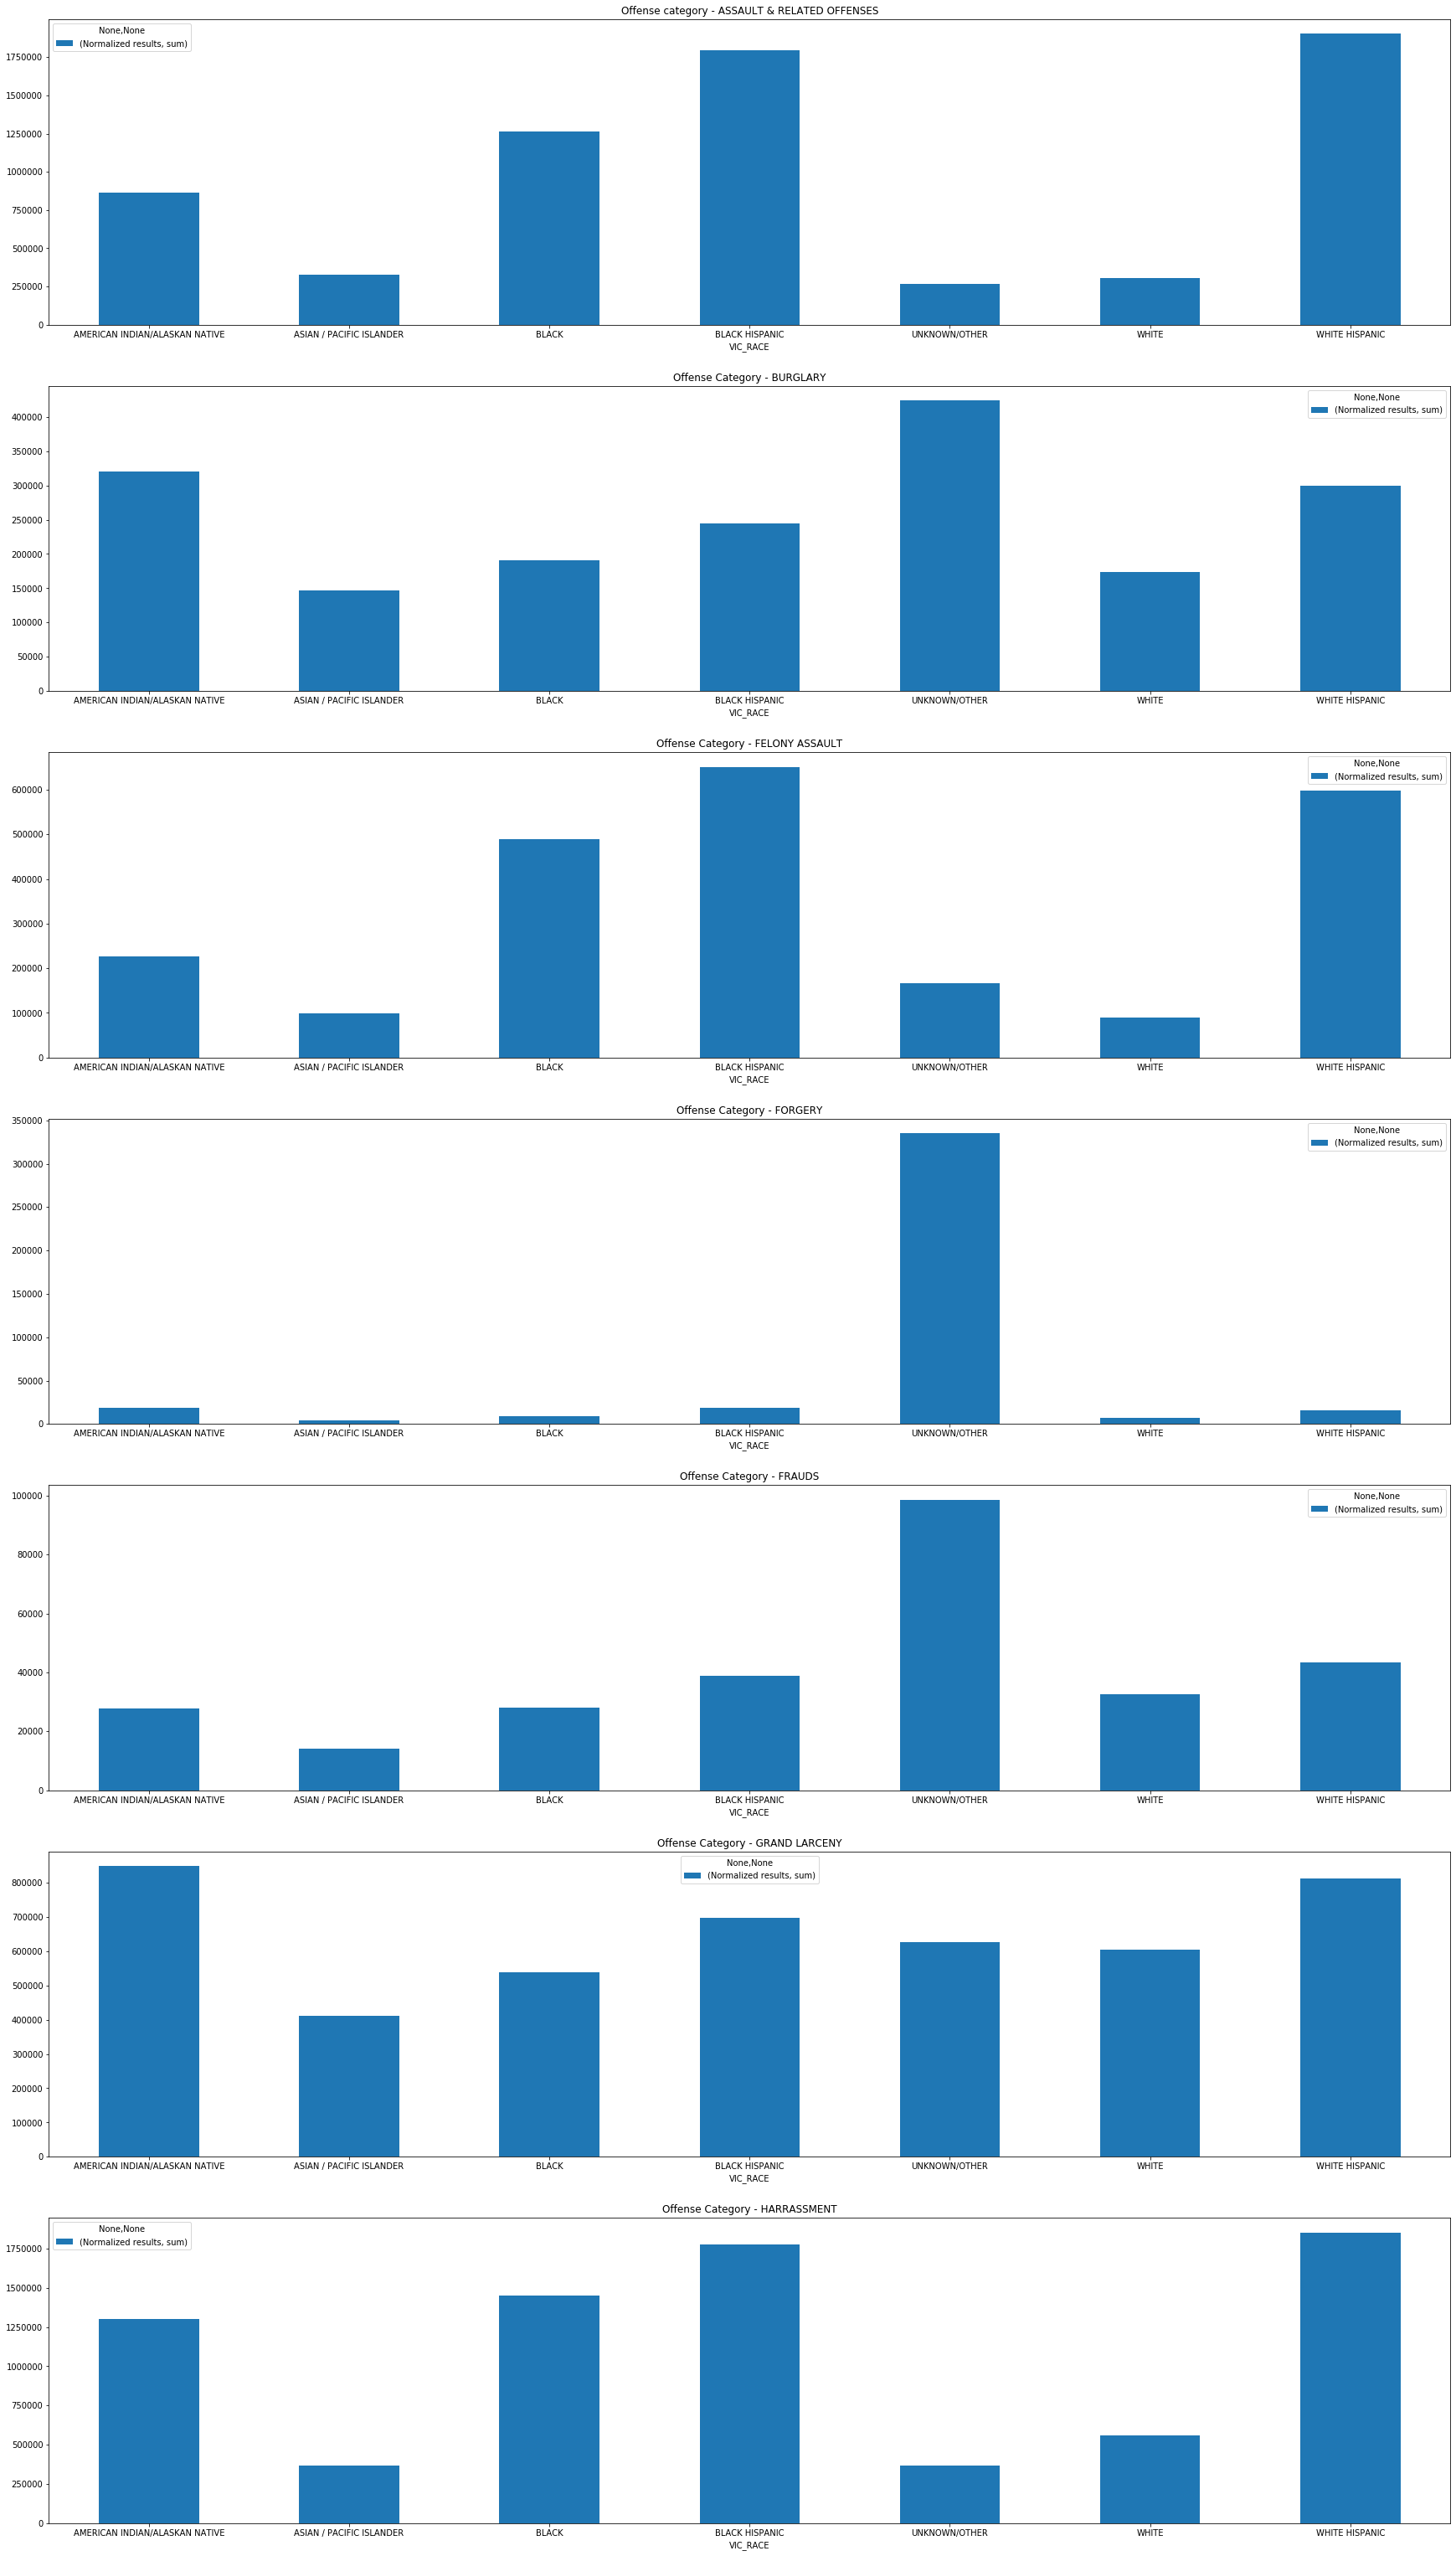

In [27]:
figure2, axis = plt.subplots(7,1,figsize=(30,55)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index

NYC_Complaints_df1.xs('ASSAULT 3 & RELATED OFFENSES').plot(kind='bar',ax=axis[0]).set_title('Offense category - ASSAULT & RELATED OFFENSES') #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
NYC_Complaints_df1.xs('BURGLARY').plot(kind='bar',ax=axis[1]).set_title('Offense Category - BURGLARY') 
NYC_Complaints_df1.xs('FELONY ASSAULT').plot(kind='bar',ax=axis[2]).set_title('Offense Category - FELONY ASSAULT') 
NYC_Complaints_df1.xs('FORGERY').plot(kind='bar',ax=axis[3]).set_title('Offense Category - FORGERY') 
NYC_Complaints_df1.xs('FRAUDS').plot(kind='bar',ax=axis[4]).set_title('Offense Category - FRAUDS')
NYC_Complaints_df1.xs('GRAND LARCENY').plot(kind='bar',ax=axis[5]).set_title('Offense Category - GRAND LARCENY') 
NYC_Complaints_df1.xs('HARRASSMENT 2').plot(kind='bar',ax=axis[6]).set_title('Offense Category - HARRASSMENT') 
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=0)
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=0)
axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=0)
axis[3].set_xticklabels(axis[3].get_xticklabels(), rotation=0)
axis[4].set_xticklabels(axis[4].get_xticklabels(), rotation=0)
axis[5].set_xticklabels(axis[5].get_xticklabels(), rotation=0)
axis[6].set_xticklabels(axis[6].get_xticklabels(), rotation=0)

# HYPOTHESIS 3:

The population density of a neighborhood impacts the number of complaints/crimes reported there.(E.g. Is there an inverse trend of the number of crimes with the population density or not).

In [29]:
my_dir = 'C:/Users/rahul/Downloads/UIUC/Sem 2 - Spring 2020/Courses/Programing Analytics/Final Project/DataSets/' #https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb
NYC_Population = my_dir + 'New_York_City_Population.csv' # Loading NYPD Arrest Data file
area_count = NYC_Complaint_Data.groupby(['BORO_NM']).count()
area_count = area_count.reset_index()
area_count

,BORO_NM,CMPLNT_NUM,CMPLNT_FR_DT,Complaint_Filed_Month,Complaint_Filed_Year
0,BRONX,1484373,1484265,1484265,1484265
1,BROOKLYN,2035004,2034792,2034792,2034792
2,MANHATTAN,1645015,1644873,1644873,1644873
3,QUEENS,1351400,1351230,1351230,1351230
4,STATEN ISLAND,321394,321372,321372,321372


In [30]:
def population_density_details(filename) -> pd.core.frame.DataFrame:
    '''
    This function returns a dataframe which contains the population density for each neighbourhood.
    The area in sq.km column is added manually.

    :param filename: The population CSV file from which dataframe needs to be created
    >>> nyc_population_sample = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/New_York_City_Population_sample.csv'
    >>> ans = population_density_details(nyc_population_sample)
    >>> ans.iloc[0]['Population']
    147388
    '''
    area_population = pd.read_csv(filename)
    area_population = area_population[area_population['Year'] > 2000]
    area_population_sum = area_population.groupby(['Borough'])['Population'].sum()
    borough_pop_df = area_population_sum.to_frame().reset_index()
    borough_pop_df['Area in sq. km'] = [109.04, 183.42, 59.13, 281.09,
                                        151.18]  # https://en.wikipedia.org/wiki/Demographics_of_New_York_City
    borough_pop_df['Population Density'] = borough_pop_df['Population'] / borough_pop_df['Area in sq. km']
    borough_pop_df['Borough'] = borough_pop_df['Borough'].str.upper()
    borough_pop_df = borough_pop_df.rename(columns={"Borough": "BORO_NM"})
    borough_pop_df['Population Density'] = borough_pop_df['Population Density'].astype('int64')
    return borough_pop_df


In [31]:
Pop_density_df = population_density_details(NYC_Population)
Pop_density_df

,BORO_NM,Population,Area in sq. km,Population Density
0,BRONX,1385108,109.04,12702
1,BROOKLYN,2504700,183.42,13655
2,MANHATTAN,1585873,59.13,26820
3,QUEENS,2230722,281.09,7935
4,STATEN ISLAND,468730,151.18,3100


In [32]:
result_df = pd.merge(area_count[['BORO_NM','CMPLNT_NUM']], Pop_density_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density
0,BRONX,1484373,1385108,109.04,12702
1,BROOKLYN,2035004,2504700,183.42,13655
2,MANHATTAN,1645015,1585873,59.13,26820
3,QUEENS,1351400,2230722,281.09,7935
4,STATEN ISLAND,321394,468730,151.18,3100


In [33]:
result_df['crime per capita'] = result_df['CMPLNT_NUM']/result_df['Population']
result_df['Population Density'] = result_df['Population Density'].astype('int64')
result_df = result_df.sort_values(by = 'Population Density',ascending = False)
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita
2,MANHATTAN,1645015,1585873,59.13,26820,1.037293
1,BROOKLYN,2035004,2504700,183.42,13655,0.812474
0,BRONX,1484373,1385108,109.04,12702,1.071666
3,QUEENS,1351400,2230722,281.09,7935,0.605813
4,STATEN ISLAND,321394,468730,151.18,3100,0.685670


In [34]:
def corr_coeff(col1, col2) -> np.float64:
    """
    :param col1: The first dataframe column you want to use for correlation calculation
    :param col2: The second dataframe column you want to use for correlation calculation
    :return: The correlation value between the two columns which is of numpy float data type
    >>> sample_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Correlation_dummy.csv'
    >>> sample_df = pd.read_csv(sample_csv)
    >>> corr_coeff(sample_df['Age'],sample_df['Height(m)'])
    0.7723621551319031
    >>> data_dummy = {'Weight':  [55,66,77,88,99,33],'Age': [22,33,44,55,66,15]}
    >>> df_dummy = pd.DataFrame (data_dummy, columns = ['Weight','Age'])
    >>> corr_coeff(df_dummy['Weight'],df_dummy['Age'])
    0.9787474369757403

    """

    plt.scatter(col1, col2)
    correlation = col1.corr(col2)
    # rp_corr = rp.corr_pair(col1,col2)
    return correlation



The correlation between Population Density and the crime per capita is :  0.7275769206466038


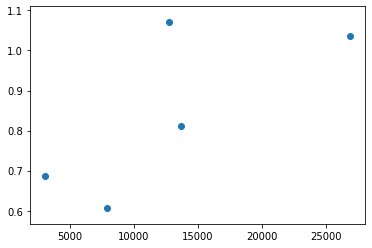

In [35]:
#calculating the correlation between Population Density and the crime per capita
#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr
correlation_coeff = corr_coeff(result_df['Population Density'],result_df['crime per capita'])
type(correlation_coeff)
print('The correlation between Population Density and the crime per capita is : ',correlation_coeff)
#print('The RP correlation between Population Density and the crime per capita is : ',rp_corr)



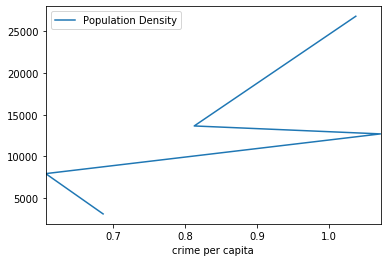

In [42]:
#https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
ax = plt.gca() 
result_df.plot(kind='line',x='crime per capita',y='Population Density',ax=ax)
#result_df.plot(kind='line',x='BORO_NM',y='crime per capita', color='red', ax=ax)
plt.show()

# HYPOTHESIS 4:

There exists a trend between the type of crimes reported in NYC and the neighborhood they occurred in. (e.g. There are a greater number of theft cases in Brooklyn than any other region)

In [36]:
NYC_Complaints_df = get_file(Complaints,3)  # importing only columns -OFNS_DESC, BORO_NM,CMPLNT_NUM,
NYC_Complaints_df.head() 

enter your column name 1 and press enter:OFNS_DESC
enter your column name 2 and press enter:BORO_NM
enter your column name 3 and press enter:CMPLNT_NUM


,CMPLNT_NUM,OFNS_DESC,BORO_NM
0,876525802,PETIT LARCENY,BROOKLYN
1,402693528,DANGEROUS WEAPONS,MANHATTAN
2,832030069,ROBBERY,QUEENS
3,538308771,PETIT LARCENY,BROOKLYN
4,965693192,THEFT-FRAUD,STATEN ISLAND


In [37]:
# Selecting only a particular set of crimes that involve harming another human
NYC_Population = my_dir + 'New_York_City_Population.csv' # Loading NYPD Arrest Data file
Pop_density_df = population_density_details(NYC_Population)
def get_crime_results(dfname) -> pd.core.frame.DataFrame:
    '''
    This function returns a dataframe which has the complaints per capita for each borough and offense

    :param dfname: NYC complaints dataframe on which operations have to be performed

    >>> sample_NYC_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/NYC_get_crime.csv'
    >>> sample_NYC_dframe = pd.read_csv(sample_NYC_csv)
    >>> Pop_density_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Dummy_pop_density.csv'
    >>> Pop_density_df = pd.read_csv(Pop_density_csv)
    >>> ans = get_crime_results(sample_NYC_dframe)
    >>> ans.iloc[0]['Population']
    2504700

    '''

    type_of_crime = ['HARRASSMENT 2', 'BURGLARY', 'ROBBERY', 'FELONY ASSAULT', 'SEX CRIMES', 'OFFENSES INVOLVING FRAUD',
                     'RAPE', 'THEFT-FRAUD', 'MURDER & NON-NEGL. MANSLAUGHTER', 'KIDNAPPING & RELATED OFFENSES',
                     'OFFENSES RELATED TO CHILDREN', 'KIDNAPPING', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY',
                     'GRAND LARCENY', 'FORGERY', 'FRAUDS', 'ASSAULT 3 & RELATED OFFENSES']
    # https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
    dfname = dfname[dfname.OFNS_DESC.isin(type_of_crime)]
    # complaints_df_new.OFNS_DESC.unique()
    g1 = dfname.groupby(["OFNS_DESC", "BORO_NM"], as_index=False).count()
    g1 = g1[["OFNS_DESC", "BORO_NM", "CMPLNT_NUM"]]
    # merging with population density dataframe to add necessary density columns
    Crime_result_df = pd.merge(g1, Pop_density_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
    # creating the per capita values by dividing complaint numbers and population
    Crime_result_df['complaints per capita'] = Crime_result_df['CMPLNT_NUM'] / Crime_result_df['Population']
    Crime_result_df['complaints per capita'] = Crime_result_df['complaints per capita'].astype('float64')
    return Crime_result_df

In [38]:
Crime_result_dataframe = get_crime_results(NYC_Complaints_df)
Crime_result_dataframe.head()

,OFNS_DESC,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,complaints per capita
0,ASSAULT 3 & RELATED OFFENSES,BRONX,178043,1385108,109.04,12702,0.128541
1,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,224303,2504700,183.42,13655,0.089553
2,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,139300,1585873,59.13,26820,0.087838
3,ASSAULT 3 & RELATED OFFENSES,QUEENS,144811,2230722,281.09,7935,0.064917
4,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,31105,468730,151.18,3100,0.066360


In [39]:
Capita_crime = Crime_result_dataframe.groupby(['BORO_NM','OFNS_DESC']).agg({'complaints per capita': ['sum']})
Capita_crime.head(10)

complaints per capita
                                                        sum
BORO_NM OFNS_DESC                                          
BRONX   ASSAULT 3 & RELATED OFFENSES               0.128541
        BURGLARY                                   0.030452
        FELONY ASSAULT                             0.050381
        FORGERY                                    0.008570
        FRAUDS                                     0.005214
        GRAND LARCENY                              0.056999
        HARRASSMENT 2                              0.135887
        KIDNAPPING                                 0.000009
        KIDNAPPING & RELATED OFFENSES              0.000493
        OFFENSES INVOLVING FRAUD                   0.003251

In [40]:
Per_Capita_crimes = Crime_result_dataframe.groupby(['OFNS_DESC','BORO_NM']).agg({'complaints per capita': ['sum']})
Per_Capita_crimes

complaints per capita
                                                               sum
OFNS_DESC                      BORO_NM                            
ASSAULT 3 & RELATED OFFENSES   BRONX                      0.128541
                               BROOKLYN                   0.089553
                               MANHATTAN                  0.087838
                               QUEENS                     0.064917
                               STATEN ISLAND              0.066360
BURGLARY                       BRONX                      0.030452
                               BROOKLYN                   0.032195
                               MANHATTAN                  0.028015
                               QUEENS                     0.026885
                               STATEN ISLAND              0.017951
FELONY ASSAULT                 BRONX                      0.050381
                               BROOKLYN                   0.034197
                               MANHATTAN                  0.029791
                               QUEENS                     0.022291
                               STATEN ISLAND              0.016777
FORGERY                        BRONX                      0.008570
                               BROOKLYN                   0.008316
                               MANHATTAN                  0.013091
                               QUEENS                     0.006492
                               STATEN ISLAND              0.003460
FRAUDS                         BRONX                      0.005214
                               BROOKLYN                   0.004693
                               MANHATTAN                  0.007830
                               QUEENS                     0.003401
                               STATEN ISLAND              0.007550
GRAND LARCENY                  BRONX                      0.056999
                               BROOKLYN                   0.062660
                               MANHATTAN                  0.143925
                               QUEENS                     0.050039
                               STATEN ISLAND              0.033426
...                                                            ...
OTHER OFFENSES RELATED TO THEF BRONX                      0.002079
                               BROOKLYN                   0.001760
                               MANHATTAN                  0.002702
                               QUEENS                     0.001395
                               STATEN ISLAND              0.001323
PETIT LARCENY                  BRONX                      0.141537
                               BROOKLYN                   0.126132
                               MANHATTAN                  0.225677
                               QUEENS                     0.098207
                               STATEN ISLAND              0.104713
RAPE                           BRONX                      0.003161
                               BROOKLYN                   0.002394
                               MANHATTAN                  0.002647
                               QUEENS                     0.002017
                               STATEN ISLAND              0.001621
ROBBERY                        BRONX                      0.042351
                               BROOKLYN                   0.034197
                               MANHATTAN                  0.030791
                               QUEENS                     0.022667
                               STATEN ISLAND              0.012094
SEX CRIMES                     BRONX                      0.010840
                               BROOKLYN                   0.010192
                               MANHATTAN                  0.012840
                               QUEENS                     0.007742
                               STATEN ISLAND              0.005986
THEFT-FRAUD                    BRONX                      0.008672
                         

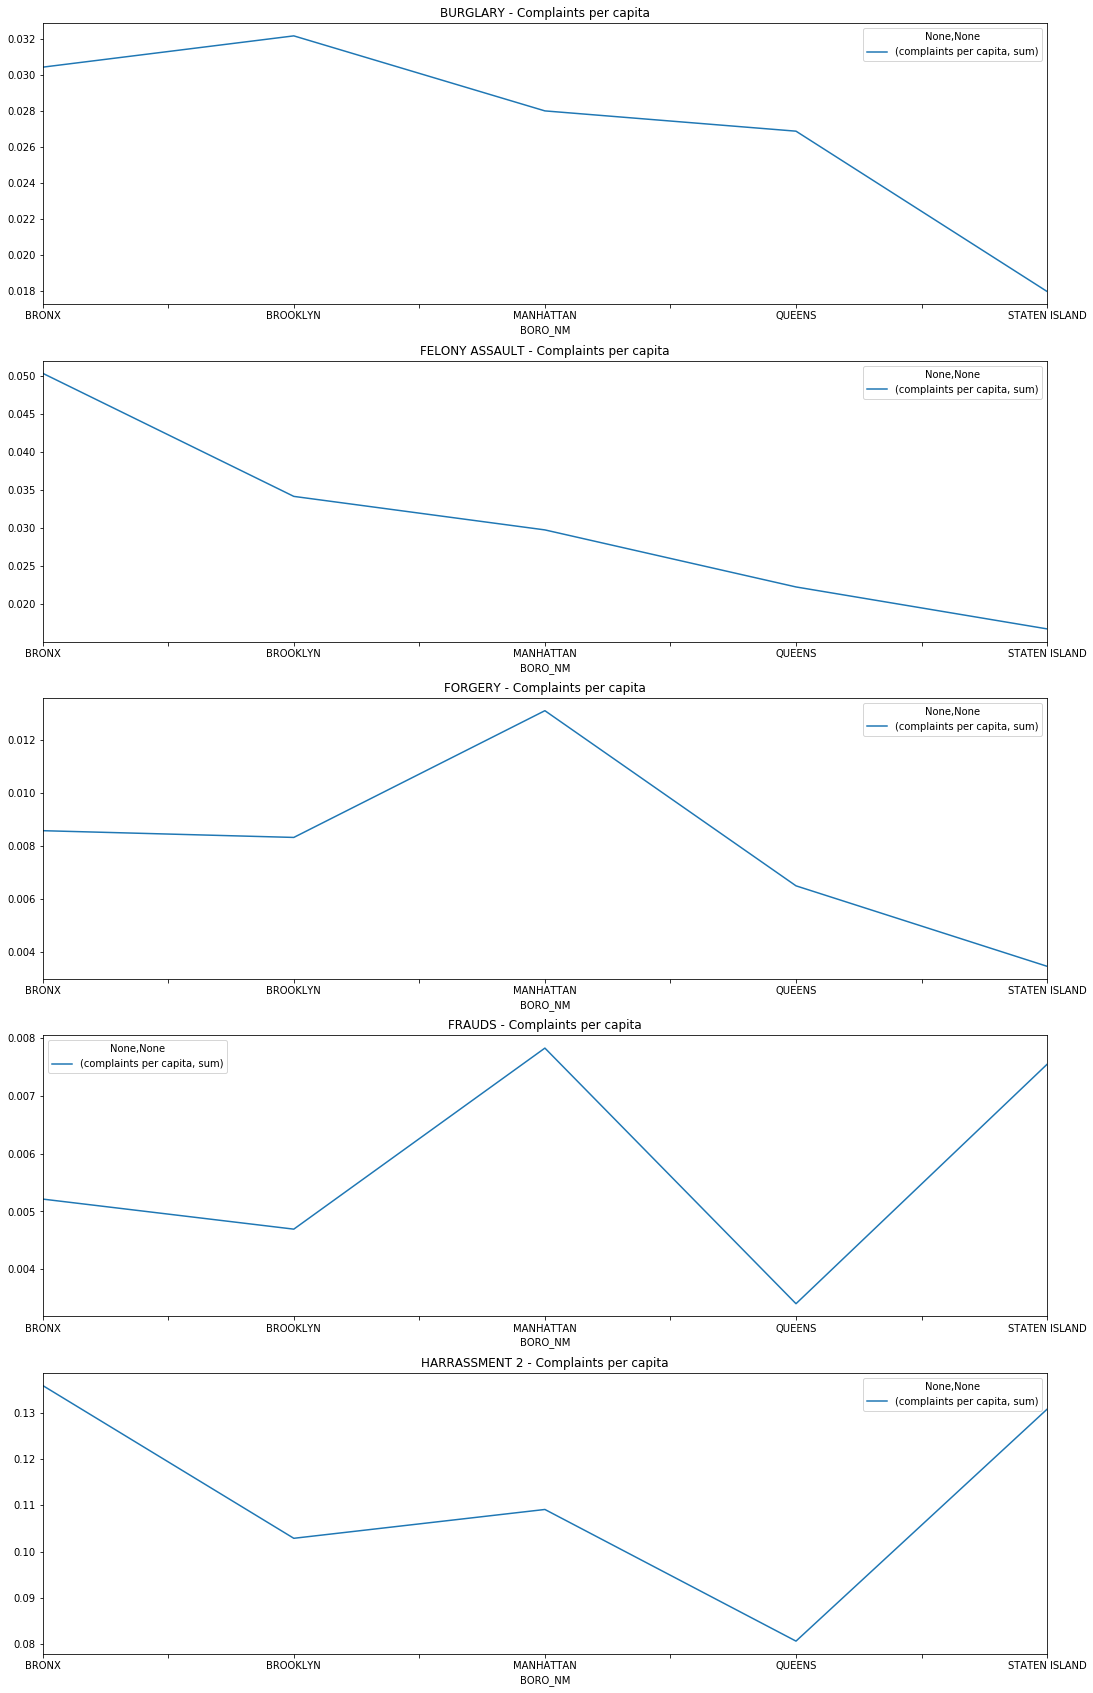

In [42]:
plot_graph(5,Per_Capita_crimes,18,30,'BURGLARY','FELONY ASSAULT','FORGERY','FRAUDS','HARRASSMENT 2','Complaints per capita')

# Hypothesis 5:
The population density is directly proportional the average response time taken by an emergency unit to respond to that incident. (E.g. Are the instances of the vehicle taking more time to reach the emergency spot greater in densely populated neighborhoods?)

In [43]:
EMS_Data = get_file(EMS_incident,3) # only import columns INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_DATETIME,BOROUGH
EMS_Data.head()

enter your column name 1 and press enter:INCIDENT_RESPONSE_SECONDS_QY
enter your column name 2 and press enter:INCIDENT_DATETIME
enter your column name 3 and press enter:BOROUGH


,INCIDENT_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,BOROUGH
0,01/01/2008 12:00:01 AM,NaN,BROOKLYN
1,01/01/2008 12:00:05 AM,NaN,BROOKLYN
2,01/01/2008 12:00:06 AM,1657.0,QUEENS
3,01/01/2008 12:00:07 AM,NaN,BROOKLYN
4,01/01/2008 12:00:09 AM,NaN,BROOKLYN


In [44]:
extract_year_month(EMS_Data,'INCIDENT_DATETIME','Incident_Month','Incident_Year')

,INCIDENT_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,BOROUGH,Incident_Month,Incident_Year
0,01/01/2008 12:00:01 AM,NaN,BROOKLYN,01,2008
1,01/01/2008 12:00:05 AM,NaN,BROOKLYN,01,2008
2,01/01/2008 12:00:06 AM,1657.0,QUEENS,01,2008
3,01/01/2008 12:00:07 AM,NaN,BROOKLYN,01,2008
4,01/01/2008 12:00:09 AM,NaN,BROOKLYN,01,2008
5,01/01/2008 12:01:09 AM,0.0,BRONX,01,2008
6,01/01/2008 12:01:15 AM,90.0,MANHATTAN,01,2008
7,01/01/2008 12:02:09 AM,463.0,QUEENS,01,2008
8,01/01/2008 12:02:30 AM,632.0,MANHATTAN,01,2008
9,01/01/2008 12:02:43 AM,416.0,BRONX,01,2008


In [45]:
import warnings #https://docs.python.org/3/library/warnings.html
warnings.filterwarnings('ignore')
EMS_Data = EMS_Data.dropna()
EMS_Data['INCIDENT_RESPONSE_SECONDS_QY']=EMS_Data['INCIDENT_RESPONSE_SECONDS_QY'].astype('int64')
EMS_Data.head(10)

,INCIDENT_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,BOROUGH,Incident_Month,Incident_Year
2,01/01/2008 12:00:06 AM,1657,QUEENS,01,2008
5,01/01/2008 12:01:09 AM,0,BRONX,01,2008
6,01/01/2008 12:01:15 AM,90,MANHATTAN,01,2008
7,01/01/2008 12:02:09 AM,463,QUEENS,01,2008
8,01/01/2008 12:02:30 AM,632,MANHATTAN,01,2008
9,01/01/2008 12:02:43 AM,416,BRONX,01,2008
10,01/01/2008 12:02:52 AM,319,BROOKLYN,01,2008
11,01/01/2008 12:03:25 AM,495,MANHATTAN,01,2008
12,01/01/2008 12:03:52 AM,471,QUEENS,01,2008
13,01/01/2008 12:04:04 AM,366,MANHATTAN,01,2008


In [46]:
#EMS_incident_response_avg = EMS_Data[['INCIDENT_RESPONSE_SECONDS_QY','BOROUGH']]
def EMS_details(dfname) -> pd.DataFrame:
    
    '''
    This function returns a dataframe containing details of the incident response time, incident datetime, borough
    There are also details pertaining to the population density , which is a result of the 2 dataframes being joined
    
    :param dfname: EMS dataframe to be passed as input
    >>> ems_sample_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/EMS_incidentResponse.csv'
    >>> ems_sample_df = pd.read_csv(ems_sample_csv)
    >>> Pop_density_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Dummy_pop_density.csv'
    >>> Pop_density_df = pd.read_csv(Pop_density_csv)
    >>> ans = EMS_details(ems_sample_df)
    >>> ans.iloc[0]['Population']
    2504700
    '''
   
    EMS_incident_response_avg = dfname
    EMS_incident_response_avg = EMS_incident_response_avg.groupby(['BOROUGH','Incident_Year','Incident_Month'],as_index = False)['INCIDENT_RESPONSE_SECONDS_QY'].mean()
   
    EMS_incident_response_avg['AVG_INCIDENT_RESPONSE (Minutes)'] = EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY']/60
    #Renaming the index to Staten Island
    EMS_incident_response_avg = EMS_incident_response_avg.replace({'BOROUGH': 'RICHMOND / STATEN ISLAND'}, 'STATEN ISLAND')
    result_inc_resp_df = pd.merge(Pop_density_df, EMS_incident_response_avg, how='inner', left_on='BORO_NM', right_on='BOROUGH')
    return result_inc_resp_df

In [47]:
EMS_Result_df = EMS_details(EMS_Data)
EMS_Result_df

,BORO_NM,Population,Area in sq. km,Population Density,BOROUGH,Incident_Year,Incident_Month,INCIDENT_RESPONSE_SECONDS_QY,AVG_INCIDENT_RESPONSE (Minutes)
0,BRONX,1385108,109.04,12702,BRONX,2008,01,469.264159,7.821069
1,BRONX,1385108,109.04,12702,BRONX,2008,02,548.894558,9.148243
2,BRONX,1385108,109.04,12702,BRONX,2008,03,493.512034,8.225201
3,BRONX,1385108,109.04,12702,BRONX,2008,04,463.216668,7.720278
4,BRONX,1385108,109.04,12702,BRONX,2008,05,504.456272,8.407605
5,BRONX,1385108,109.04,12702,BRONX,2008,06,523.507759,8.725129
6,BRONX,1385108,109.04,12702,BRONX,2008,07,468.970765,7.816179
7,BRONX,1385108,109.04,12702,BRONX,2008,08,457.533278,7.625555
8,BRONX,1385108,109.04,12702,BRONX,2008,09,483.628107,8.060468
9,BRONX,1385108,109.04,12702,BRONX,2008,10,468.165752,7.802763


The correlation coefficient between Population Density and the Incident response time is :  0.4639141825587108


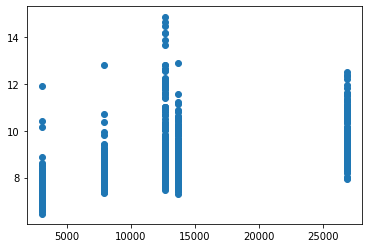

In [48]:
#calculating the correlation between Population Density and the incident response time
#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr
correlation_coeff = corr_coeff(EMS_Result_df['Population Density'],EMS_Result_df['AVG_INCIDENT_RESPONSE (Minutes)'])
print('The correlation coefficient between Population Density and the Incident response time is : ',correlation_coeff)

In [49]:
EMS_Grouped_result= EMS_Result_df.groupby(['BORO_NM','Incident_Year','Incident_Month']).agg({'AVG_INCIDENT_RESPONSE (Minutes)': ['sum']})
EMS_Grouped_result

AVG_INCIDENT_RESPONSE (Minutes)
                                                                       sum
BORO_NM       Incident_Year Incident_Month                                
BRONX         2008          01                                    7.821069
                            02                                    9.148243
                            03                                    8.225201
                            04                                    7.720278
                            05                                    8.407605
                            06                                    8.725129
                            07                                    7.816179
                            08                                    7.625555
                            09                                    8.060468
                            10                                    7.802763
                            11                                    7.647434
                            12                                    8.492934
              2009          01                                    7.947173
                            02                                    7.581625
                            03                                    7.907127
                            04                                    8.033873
                            05                                   10.507347
                            06                                    9.665751
                            07                                    8.638272
                            08                                    8.434349
                            09                                    8.184050
                            10                                    8.075493
                            11                                    7.856766
                            12                                    8.319111
              2010          01                                    8.424227
                            02                                    8.289266
                            03                                    8.199156
                            04                                    8.210946
                            05                                    9.390368
                            06                                    9.385025
...                                                                    ...
STATEN ISLAND 2017          07                                    6.947364
                            08                                    6.763392
                            09                                    7.023467
                            10                                    6.958616
                            11                                    7.447408
                            12                                    7.607067
              2018          01                                    7.782383
                            02                                    7.168499
                            03                                    6.956904
                            04                                    7.446912
                            05                                    7.945626
                            06                                    7.430137
                            07                                    7.253643
                            08                                    7.487971
                            09                                    7.756479
                            10                                    7.907549
                            11                                    8.264687
                            12                                    8.376529
              2019          01                                    7.799404
                            02                                    7.

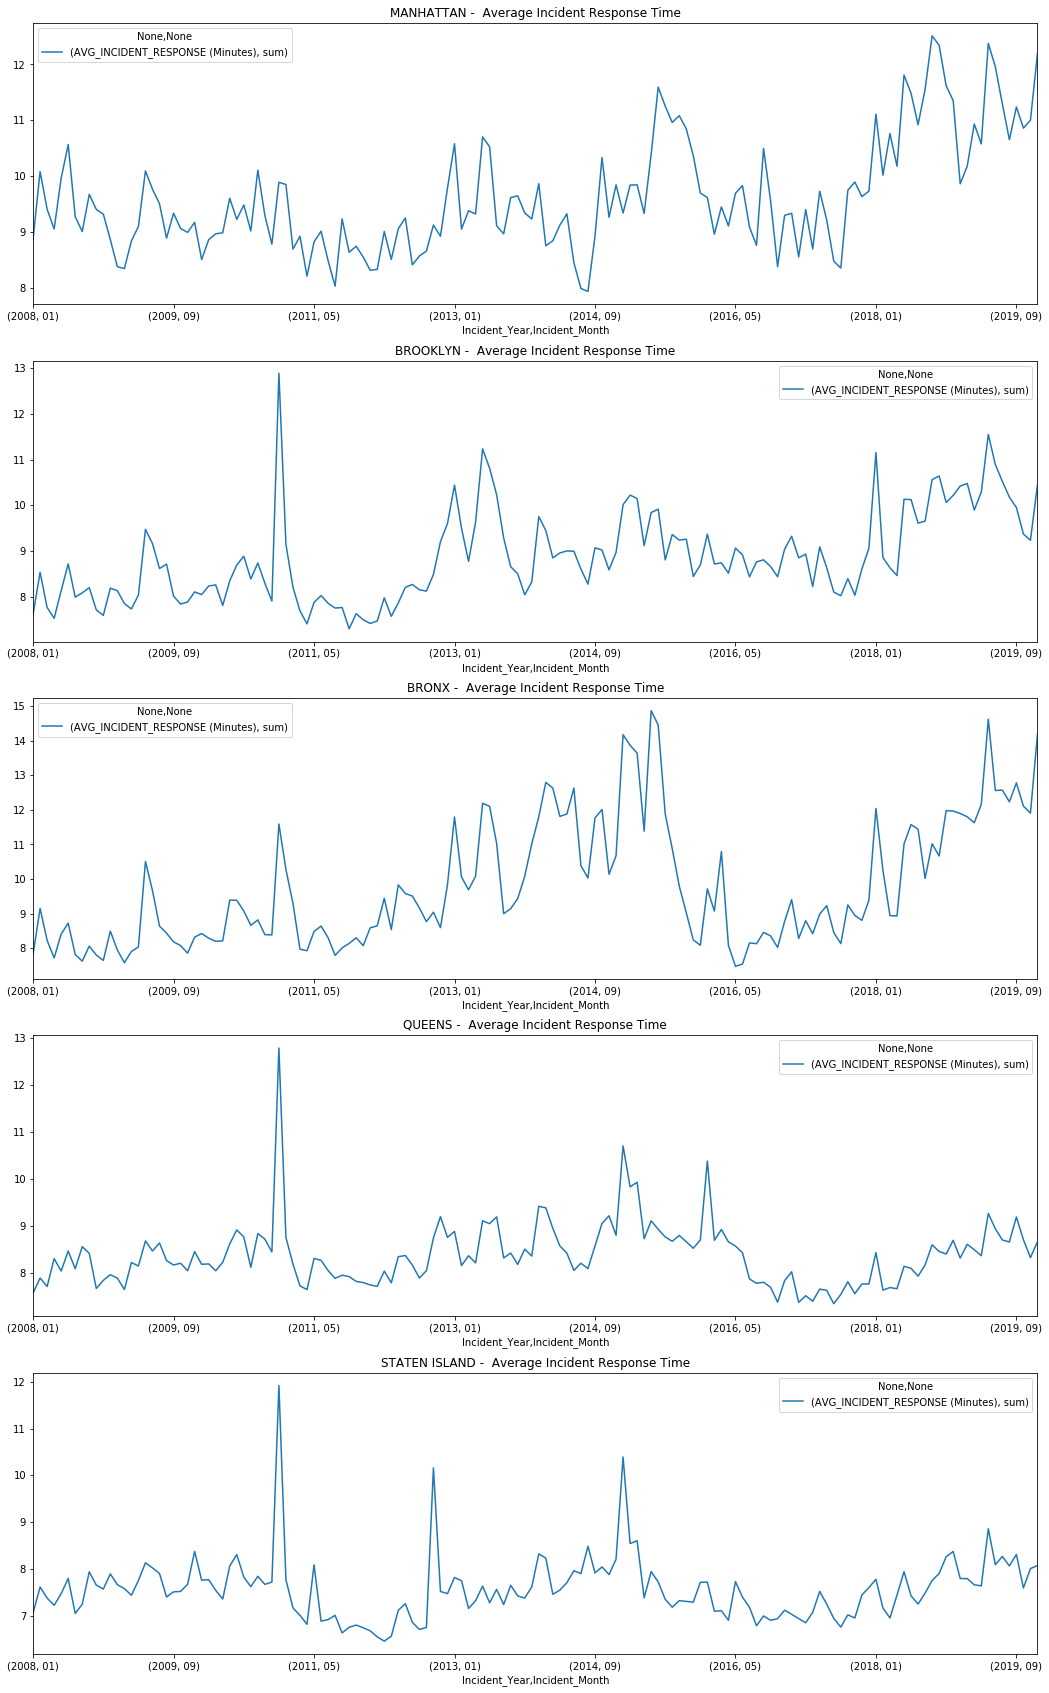

In [50]:
plot_graph(5,EMS_Grouped_result,18,30,'MANHATTAN','BROOKLYN','BRONX','QUEENS','STATEN ISLAND',' Average Incident Response Time')

Trying:
    ems_sample_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/EMS_incidentResponse.csv'
Expecting nothing
ok
Trying:
    ems_sample_df = pd.read_csv(ems_sample_csv)
Expecting nothing
ok
Trying:
    Pop_density_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Dummy_pop_density.csv'
Expecting nothing
ok
Trying:
    Pop_density_df = pd.read_csv(Pop_density_csv)
Expecting nothing
ok
Trying:
    ans = EMS_details(ems_sample_df)
Expecting nothing
ok
Trying:
    ans.iloc[0]['Population']
Expecting:
    2504700
ok
Trying:
    sample_csv = 'https://raw.githubusercontent.com/rahulrohri/final_project_2020Sp/master/DocTest%20Dummy%20Files/Correlation_dummy.csv'
Expecting nothing
ok
Trying:
    sample_df = pd.read_csv(sample_csv)
Expecting nothing
ok
Trying:
    corr_coeff(sample_df['Age'],sample_df['Height(m)'])
Expecting:
    0.7723621551319031
ok
Trying:
    data_dummy = {'Weig

TestResults(failed=0, attempted=49)

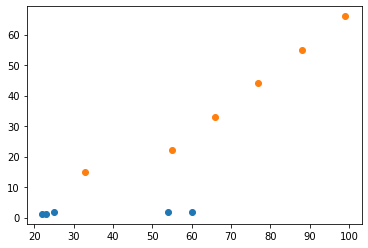

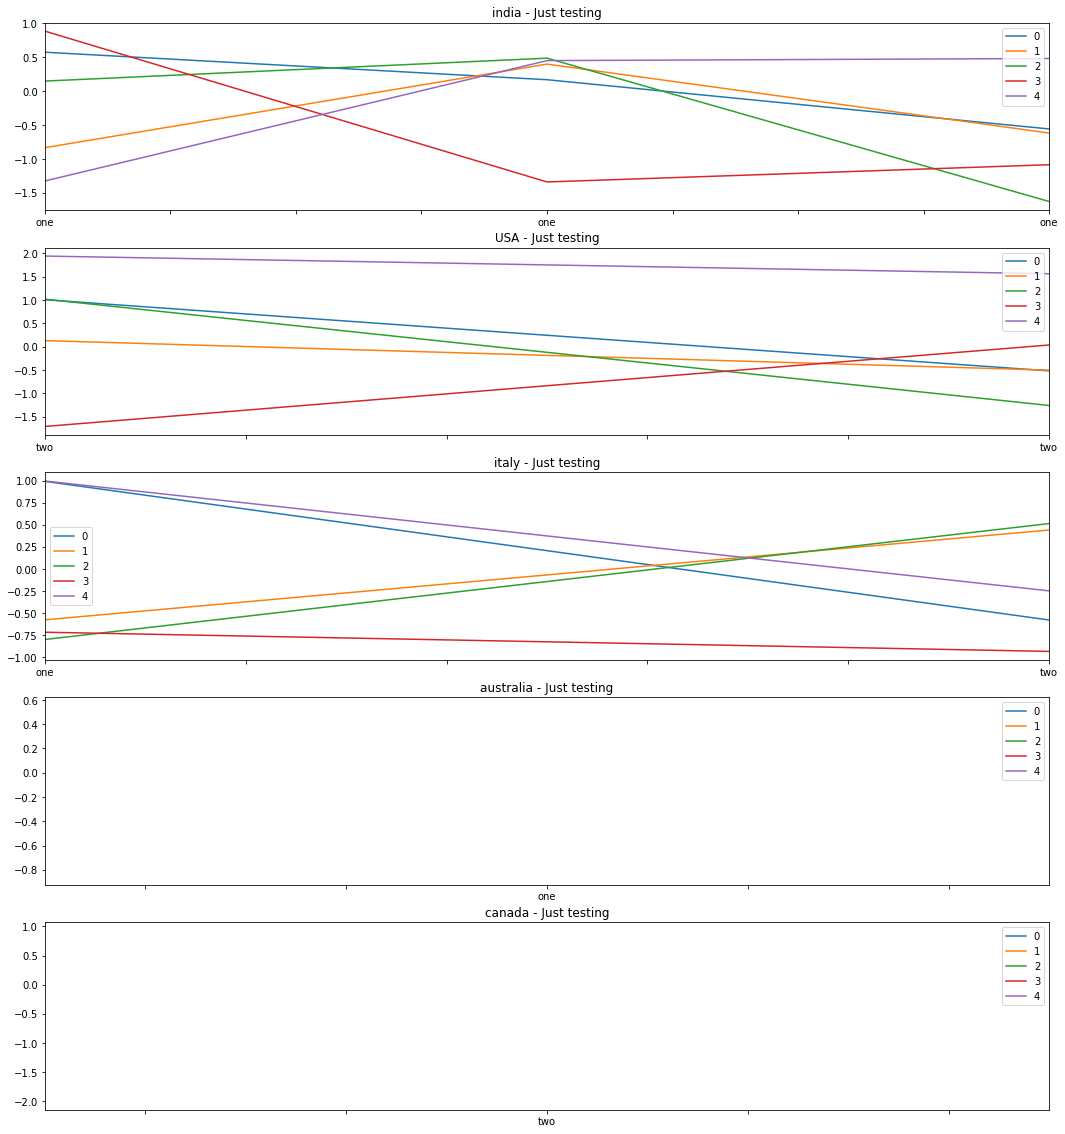

In [53]:
import doctest
doctest.testmod(verbose=True)

# End of Program